## Importing Libraries

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import pandas as pd


In [1]:
#import tensorflow_hub as hub
import tensorflow as tf

## Dataset

In [ ]:
#DATADIR = "C:\\Users\\vvohra\\Downloads\\trashnet-data-20190703T052454Z-001\\trashnet-data\\dataset-resized\\dataset-resized"
DATADIR = "C:\\Users\\vvohra\\Downloads\\data"

In [ ]:
#Class Labels
Categories=['bio','nonbio']

<table>
  <tr>
    <th>Label</th>
    <th>Class</th> 
  </tr>
  <tr>
    <td>0</td>
    <td>Cardboard</td> 
  </tr>
  <tr>
    <td>1</td>
    <td>Glass</td> 
  </tr>
    <tr>
    <td>2</td>
    <td>Metal</td> 
  </tr>
    <tr>
    <td>3</td>
    <td>Paper</td> 
  </tr>
    <tr>
    <td>4</td>
    <td>Plastic</td> 
  </tr>
    <tr>
    <td>5</td>
    <td>Trash</td> 
  </tr>
</table>

C:\Users\vvohra\Downloads\dataset-original\dataset-original\cardboard


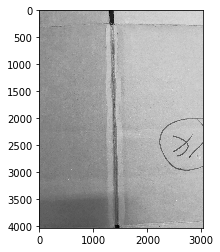

In [4]:
#Load Dataset
for category in Categories:
    path = os.path.join(DATADIR, category)
    print(path)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

In [5]:
#Size of image array
img_array.shape

(4032, 3024)

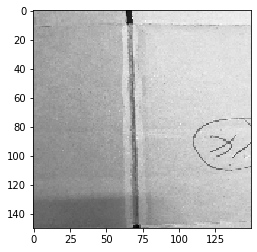

In [6]:
# ReSize image
IMG_SIZE = 150
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

## Train - Test Split

In [7]:
training_data = []

def create_training_data():
    for category in Categories:
        path = os.path.join(DATADIR, category)
        class_num = Categories.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
            
create_training_data()

In [73]:
# divided classes into 0-5
df=pd.DataFrame(training_data)
df.columns=['pixels','classes']
df.head()

,pixels,classes
0,"[[173, 174, 175, 176, 177, 178, 178, 178, 180,...",2
1,"[[228, 228, 228, 227, 228, 226, 229, 229, 229,...",5
2,"[[198, 200, 200, 202, 201, 198, 200, 200, 202,...",1
3,"[[219, 215, 220, 218, 215, 214, 215, 212, 214,...",4
4,"[[175, 173, 177, 174, 176, 178, 175, 175, 173,...",4


In [9]:
Size_Train=len(training_data)

In [10]:
# Size of Training Data
print(Size_Train)

2527


In [ ]:
#shuffle data to avoid memorization
import random
random.shuffle(training_data)

In [69]:
#slice training data to make test dataset
percent = int((Size_Train*20)/100)
training_data=training_data[percent:]
test_data=training_data[:percent]

In [12]:
X = []
y = []

In [13]:
for features, label in training_data:
    X.append(features)
    y.append(label)

In [14]:
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE,1)
print(len(X),len(y))

2527 2527


In [15]:
#Training dataset store

import pickle
pickle_out = open("x_train.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()


In [16]:
#labels in y
pickle_out = open("y_train.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()
print('labels',y[:10])

[3, 4, 3, 4, 4, 4, 3, 2, 4, 2]


## Test Data

In [ ]:
Test_size=len(test_data)
X = []
y = []
for features, label in test_data:
    X.append(features)
    y.append(label)

pickle_out = open("x_test.pickle", "wb")
pickle.dump(, pickle_out)
pickle_out.close()
pickle_out = open("y_test.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()


In [18]:
#Create Validation Data

### Convolution Neural Network

In [19]:
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

import pickle

In [20]:
pickle_in = open("x_train.pickle","rb")
X = pickle.load(pickle_in)
pickle_in = open("y_train.pickle","rb")
y = pickle.load(pickle_in)
#Normalize
X = X/255.0

In [54]:
X.shape[1:]

(150, 150, 1)

### Building CNN Model

In [55]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu,
                           input_shape=X.shape[1:]),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
   
    tf.keras.layers.Dense(6,  activation=tf.nn.softmax)
])

In [56]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [57]:
model.fit(X, y, batch_size=32, epochs=10, validation_split=0.2)

Train on 2274 samples, validate on 253 samples
Epoch 1/10
2274/2274 [==============================] - 102s 45ms/sample - loss: 1.7778 - acc: 0.2823 - val_loss: 1.8789 - val_acc: 0.2688
Epoch 2/10
2274/2274 [==============================] - 98s 43ms/sample - loss: 1.4615 - acc: 0.4072 - val_loss: 1.6090 - val_acc: 0.3557
Epoch 3/10
2274/2274 [==============================] - 100s 44ms/sample - loss: 1.2670 - acc: 0.5040 - val_loss: 1.6450 - val_acc: 0.3676
Epoch 4/10
2274/2274 [==============================] - 102s 45ms/sample - loss: 0.9810 - acc: 0.6491 - val_loss: 1.7199 - val_acc: 0.4071
Epoch 5/10
2274/2274 [==============================] - 101s 45ms/sample - loss: 0.6625 - acc: 0.7740 - val_loss: 1.9611 - val_acc: 0.4032
Epoch 6/10
2274/2274 [==============================] - 98s 43ms/sample - loss: 0.4073 - acc: 0.8681 - val_loss: 2.1474 - val_acc: 0.4269
Epoch 7/10
2274/2274 [==============================] - 97s 43ms/sample - loss: 0.2715 - acc: 0.9129 - val_loss: 2.3085 -

In [59]:
model.save('Trashnet98.model')

In [71]:
# tf.keras.layers.Dropout(0.2),
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 150, 150, 32)      320       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 37, 37, 64)        0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 87616)             0         
_________________________________________________________________
dense_18 (Dense)             (None, 128)               11214976  
_________________________________________________________________
dense_19 (Dense)             (None, 6)                 774       
Total para